# Integer Optimization with Pyomo

In [48]:
#import pyomo
import pyomo.environ as pyo
import pandas as pd
from pandas import *
from pyomo.environ import *
import requests
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt


# Finding Weather Data for Munich

In [2]:
import requests, json


### keys

api_key = "c89d098c41c75d31f57ca2a4b12d0eeb"
api_key2= "f60822f9e7b31667c7fbdd53d73977b8"

In [3]:
# Give city name
city_name = input("Munich")

In [4]:
#initialize variable temperature_celsius
temperature_celsius = 0


# Time Series

# Functions

In [79]:
def get_munich_temperature(start_date, end_date):
    global temperature_df
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    api_key = "f60822f9e7b31667c7fbdd53d73977b8"  # Replace with your OpenWeatherMap API key


    # Create an empty list to store the temperature data
    temperature_data = []

    # Define the date range
    date_range = pd.date_range(start=start_date, end=end_date, freq="D")

    # Iterate over the dates and make API requests
    for date in date_range:
        # Format the date as required by the API (UNIX timestamp)
        unix_timestamp = int(date.timestamp())

        # Prepare the API request parameters
        params = {
            "lat": 48.137154,  # Latitude of Munich
            "lon": 11.576124,  # Longitude of Munich
            "appid": api_key,
            "exclude": "current,minutely,hourly",
            "dt": unix_timestamp,
            "units": "metric"  # Retrieve temperature in Celsius
        }

        # Send the API request
        response = requests.get(base_url, params=params)
        data = response.json()

        # Extract the temperature from the API response
        temperature = data["main"]["temp"]

        # Append the date and temperature to the list
        temperature_data.append({"day": date, "temperature": temperature})

    # Create a DataFrame from the list of temperature data
    temperature_df = pd.DataFrame(temperature_data)

    return temperature_df


In [87]:
import requests
import pandas as pd

# API key
API_KEY = "f60822f9e7b31667c7fbdd53d73977b8"

# Get the list of dates from 01-01-22 to today
dates = pd.date_range("2022-01-01", "2023-06-12")

# Create a DataFrame to store the results
df = pd.DataFrame(columns=["Day", "Temperature"], index=dates)

# Loop through the dates and get the temperature for Munich
for date in dates:
    # Get the URL
    url = "https://api.openweathermap.org/data/2.5/weather?q=munich&appid=" + API_KEY + "&units=metric&date=" + date.strftime("%Y-%m-%d")

    # Make the request
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Get the temperature
        temperature = response.json()["main"]["temp"]

        # Add the result to the DataFrame
        df.loc[date, "Temperature"] = temperature

# Print the DataFrame
print(df)


            Day Temperature
2022-01-01  NaN       15.68
2022-01-02  NaN       15.84
2022-01-03  NaN       15.68
2022-01-04  NaN       15.84
2022-01-05  NaN       15.84
...         ...         ...
2023-06-08  NaN       15.61
2023-06-09  NaN       15.86
2023-06-10  NaN       15.86
2023-06-11  NaN       15.86
2023-06-12  NaN       15.86

[528 rows x 2 columns]


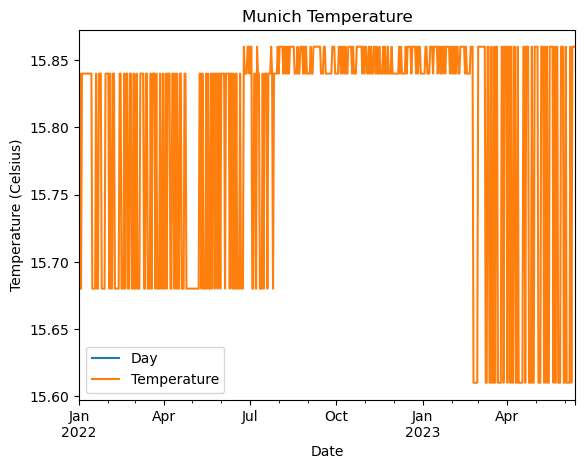

In [88]:
#graph time series of df
df.plot()
plt.title("Munich Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (Celsius)")
plt.show()

In [93]:
# API key
API_KEY = "f60822f9e7b31667c7fbdd53d73977b8"

# Get the URL
url = "https://api.openweathermap.org/data/2.5/weather?q=munich&appid=" + API_KEY + "&units=metric&date=2022-01-01"

# Make the request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the temperature
    temperature = response.json()["main"]["temp"]

    # Create a DataFrame
    df = pd.DataFrame({"Day": "2022-01-01", "Temperature": temperature}, index=[0])

# Print the DataFrame
print(df)

          Day  Temperature
0  2022-01-01        15.61


In [80]:
# Usage example
start_date = "2022-01-01"
end_date = "2023-06-12"
temperature_data = get_munich_temperature(start_date, end_date)
print(temperature_data)

           day  temperature
0   2022-01-01        16.66
1   2022-01-02        16.50
2   2022-01-03        16.50
3   2022-01-04        16.50
4   2022-01-05        16.50
..         ...          ...
523 2023-06-08        16.40
524 2023-06-09        16.40
525 2023-06-10        16.40
526 2023-06-11        16.40
527 2023-06-12        16.40

[528 rows x 2 columns]


In [81]:
temperature_df

,day,temperature
0,2022-01-01,16.66
1,2022-01-02,16.50
2,2022-01-03,16.50
3,2022-01-04,16.50
4,2022-01-05,16.50
...,...,...
523,2023-06-08,16.40
524,2023-06-09,16.40
525,2023-06-10,16.40
526,2023-06-11,16.40


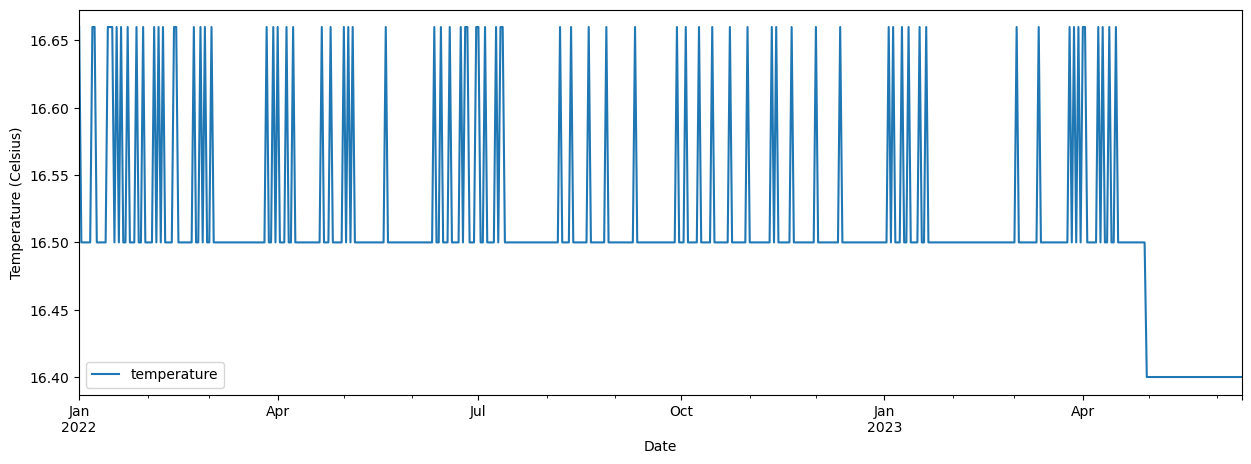

In [82]:
#graph time series of temperature_df
temperature_df.plot(x="day", y="temperature", figsize=(15, 5))
plt.xlabel("Date")
plt.ylabel("Temperature (Celsius)")
plt.show()
  
  

In [47]:
#export temperature data to csv
temperature_data.to_csv('temperature_data.csv', index=False)


In [5]:
def get_weather(city):
    global temperature_celsius
    global humidity
    api_key = 'f60822f9e7b31667c7fbdd53d73977b8'
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'

    try:
        response = requests.get(url)
        data = response.json()

        if response.status_code == 200:
            weather = data['weather'][0]['description']
            temperature = data['main']['temp']
            temperature_celsius = temperature - 273.15              
            temperature_celsius = round(temperature_celsius, 0)
            #convert temperature celsius to integer
            temperature_celsius = int(temperature_celsius)
            humidity = data['main']['humidity']
            humidity = float(humidity)


            print(f"Weather in {city}: {weather}")
            print(f"Temperature: {temperature_celsius} C")
            print(f"Humidity: {humidity}%")

        else:
            print(f"Error: {data['message']}")
            
    except requests.exceptions.RequestException as e:
        print(f"Error: {str(e)}")



In [6]:

# Example usage
get_weather('Munich')

Weather in Munich: clear sky
Temperature: 17 C
Humidity: 54.0%


In [7]:
temperature_celsius

17

In [8]:
humidity

54.0

In [9]:

def get_demands_by_temperature(temperature_celsius):
    global wine_demand
    global ice_cream_demand
    global coffee_demand
    #make
    

    if temperature_celsius <= 10:
        wine_demand = int(80)
        ice_cream_demand = int(5)
        coffee_demand = int(60)
    elif temperature_celsius > 10 and temperature_celsius <= 20:
        wine_demand = int(30)
        ice_cream_demand = int(20)
        coffee_demand = int(80)
    elif temperature_celsius > 20:
        wine_demand = int(5)
        ice_cream_demand = int(80)
        coffee_demand = int(40)

    return wine_demand, ice_cream_demand, coffee_demand

In [10]:
get_demands_by_temperature(temperature_celsius)

(30, 20, 80)

In [11]:
wine_demand

30

# Creating seasons and demand 

In [12]:
# Create a concrete model
model = pyo.ConcreteModel()

In [13]:
wine_demand

30

In [14]:
# create three variables for hot_wine, coffee and ice_cream with bounds between 0 and 40 which must be random
model.hot_wine = pyo.Var(within=pyo.NonNegativeReals, bounds=(0,100), initialize= wine_demand)
model.coffee = pyo.Var(within=pyo.NonNegativeReals, bounds=(0,100), initialize= coffee_demand)
model.ice_cream = pyo.Var(within=pyo.NonNegativeReals, bounds=(0,100), initialize= ice_cream_demand)

## Define the Objective Function

These are the profits

In [16]:
#define the objective function
model.obj = pyo.Objective(expr = 2*model.hot_wine + 3*model.coffee + model.ice_cream, sense = maximize)

In [17]:
#show the objective function
model.pprint()

3 Var Declarations
    coffee : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :    80 :   100 : False : False : NonNegativeReals
    hot_wine : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :    30 :   100 : False : False : NonNegativeReals
    ice_cream : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :    20 :   100 : False : False : NonNegativeReals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 2*hot_wine + 3*coffee + ice_cream

4 Declarations: hot_wine coffee ice_cream obj


## Define the Constrains

These are the weights

In [19]:
#capacity constraint for hot_wine and ice_cream and coffee
model.hot_wine_con = pyo.Constraint(expr = model.hot_wine <= 120)
model.coffee_con = pyo.Constraint(expr = model.coffee <= 200)
model.ice_cream_con = pyo.Constraint(expr = model.ice_cream <= 70)

In [23]:
#demand constrains for hot_wine, coffee and ice_cream
model.hot_wine_demand_con = pyo.Constraint(expr = model.hot_wine <= (wine_demand))
model.coffee_con2 = pyo.Constraint(expr = model.coffee <= (coffee_demand))
model.ice_cream_con2 = pyo.Constraint(expr = model.ice_cream <= (ice_cream_demand))

(type=<class 'pyomo.core.base.constraint.ScalarConstraint'>) on block unknown
with a new Component (type=<class
'pyomo.core.base.constraint.AbstractScalarConstraint'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
'pyomo.core.base.constraint.ScalarConstraint'>) on block unknown with a new
Component (type=<class
'pyomo.core.base.constraint.AbstractScalarConstraint'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
(type=<class 'pyomo.core.base.constraint.ScalarConstraint'>) on block unknown
with a new Component (type=<class
'pyomo.core.base.constraint.AbstractScalarConstraint'>). This is usually
indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().


In [24]:
instance = model.create_instance()  # Create a concrete instance of the model

In [26]:
#create different solvers and solve the model
opt = SolverFactory('cbc')
results = opt.solve(instance) # solves and updates instance
instance.display() # display solution
  
# print the values of the variables
print("The value of hot_wine is: " + str(pyo.value(instance.hot_wine)))
print("The value of coffee is: " + str(pyo.value(instance.coffee)))
print("The value of ice_cream is: " + str(pyo.value(instance.ice_cream)))
  
# print the values of the objective function
print("The value of the objective function is: " + str(pyo.value(instance.obj)))

 

Model unknown

  Variables:
    hot_wine : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  30.0 :   100 : False : False : NonNegativeReals
    coffee : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  80.0 :   100 : False : False : NonNegativeReals
    ice_cream : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  20.0 :   100 : False : False : NonNegativeReals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 320.0

  Constraints:
    hot_wine_con : Size=1
        Key  : Lower : Body : Upper
        None :  None : 30.0 : 120.0
    coffee_con : Size=1
        Key  : Lower : Body : Upper
        None :  None : 80.0 : 200.0
    ice_cream_con : Size=1
        Key  : Lower : Body : Upper
        None :  None : 20.0 :  70.0
    hot_wine_demand_con : Size=1
        Ke

In [27]:
#use  using AbstractModel.create_instance() or AbstractScalarVar.construct() to create a concrete instance of the model
opt = SolverFactory('glpk') #select solver
results = opt.solve(instance) #solve the problem
instance.display() #display the results

Model unknown

  Variables:
    hot_wine : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  30.0 :   100 : False : False : NonNegativeReals
    coffee : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  80.0 :   100 : False : False : NonNegativeReals
    ice_cream : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  20.0 :   100 : False : False : NonNegativeReals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 320.0

  Constraints:
    hot_wine_con : Size=1
        Key  : Lower : Body : Upper
        None :  None : 30.0 : 120.0
    coffee_con : Size=1
        Key  : Lower : Body : Upper
        None :  None : 80.0 : 200.0
    ice_cream_con : Size=1
        Key  : Lower : Body : Upper
        None :  None : 20.0 :  70.0
    hot_wine_demand_con : Size=1
        Ke

In [29]:
# Print the results of the optimization problem
print("The value of hot_wine is: " + str(pyo.value(instance.hot_wine)))
print("The value of coffee is: " + str(pyo.value(instance.coffee)))
print("The value of ice_cream is: " + str(pyo.value(instance.ice_cream)))
print("The value of the objective function is: " + str(pyo.value(instance.obj)))

The value of hot_wine is: 30.0
The value of coffee is: 80.0
The value of ice_cream is: 20.0
The value of the objective function is: 320.0


In [32]:
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 320.0
  Upper bound: 320.0
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 3
  Number of nonzeros: 6
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0022602081298828125
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

## Step 5: Solve the problem

In [ ]:
# Solve the optimization problem with bounds and constraints
opt = SolverFactory('glpk')
results = opt.solve(model) # solves and updates instance
model.pprint()

## Step 6: Solution

In [28]:
# Print the results of the optimization problem
print('x1 = ', pyo.value(model.x1))
print('x2 = ', pyo.value(model.x2))
print('x3 = ', pyo.value(model.x3))
print('Objective = ', pyo.value(model.obj))
 
   

AttributeError: 'ConcreteModel' object has no attribute 'x1'

In [ ]:
results.write()
